In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [20]:
#import new data

df=pd.read_csv('../data-wrangling/suicide_unemployment_depresion.csv', index_col=0)

In [21]:
#converting year to datetime

df['year']=pd.to_datetime(df['year'], format='%Y')

In [49]:
# A function to select one or multiple countries and loc the data from the list given.

def data_country(country):
    i=pd.concat([df.loc[df['country']==i] for i in country])
    return i

In [51]:
#testing function with a list of countries
data_country(['Germany'])

,year,country,sex,suicides_no,population,HDIforyear,gdp_for_year($),gdp_per_capita($),unemployment,depression_rate,suicides_per_100K
546,1990-01-01,Germany,female,4390,38943900,0.801,1764967948917,23546,6.1190,4.965477,11.272625
547,1990-01-01,Germany,male,9534,36014900,0.801,1764967948917,23546,4.0393,2.841100,26.472377
674,1991-01-01,Germany,female,4354,39141800,NaN,1861873895109,24662,6.5251,4.955636,11.123658
675,1991-01-01,Germany,male,9656,36354100,NaN,1861873895109,24662,4.4244,2.838838,26.560966
804,1992-01-01,Germany,female,4132,39361600,NaN,2123130870382,27888,8.2263,4.944267,10.497541
805,1992-01-01,Germany,male,9326,36770100,NaN,2123130870382,27888,4.9109,2.840001,25.362999
936,1993-01-01,Germany,female,3730,39609900,NaN,2068555542411,26937,9.3198,4.929486,9.416838
937,1993-01-01,Germany,male,8960,37183500,NaN,2068555542411,26937,6.4606,2.839658,24.096710
1068,1994-01-01,Germany,female,3588,39772400,NaN,2205966011812,28588,10.3158,4.910281,9.021331
1069,1994-01-01,Germany,male,9130,37391000,NaN,2205966011812,28588,7.5441,2.840171,24.417641


In [27]:
# see my list of countries

df['country'].unique()

array(['Antigua and Barbuda', 'Argentina', 'Australia', 'Austria',
       'Bahamas', 'Bahrain', 'Barbados', 'Belgium', 'Brazil', 'Bulgaria',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Dominica', 'Ecuador',
       'France', 'Greece', 'Grenada', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Japan', 'Kuwait', 'Luxembourg', 'Malta',
       'Mauritius', 'Mexico', 'Netherlands', 'New Zealand', 'Panama',
       'Paraguay', 'Portugal', 'Puerto Rico', 'Republic of Korea',
       'Saint Vincent and Grenadines', 'Seychelles', 'Singapore', 'Spain',
       'Sri Lanka', 'Suriname', 'Thailand', 'Trinidad and Tobago',
       'United Kingdom', 'United States', 'Uruguay', 'Belize',
       'Guatemala', 'Norway', 'Saint Lucia', 'Albania', 'Finland',
       'Sweden', 'Turkmenistan', 'Ukraine', 'Guyana', 'Romania',
       'Russian Federation', 'Armenia', 'Azerbaijan', 'Belarus',
       'Czech Republic', 'El Salvador', 'Georgia', 'Germany',
       'Kazakhstan', 'Kyrgyzstan', 'Poland',

In [85]:
# A function to plot graphs from a specific list of  country.

def plot_suicide_rating(country):
    fig, ax1 = plt.subplots(figsize=(15,10))
    
    ax1 = sns.lineplot(x=data_country(country)['year'],
                       y=data_country(country)['suicides_per_100K'],
                       hue=data_country(country)['country'], style='sex', data=data_country(country),dashes=True)
    
    ax1.set_xlabel("Year")
    ax1.set_ylabel("suicides rate (per-100k)")
    
    plt.title(f'Suicide rating from this list of countries :{country}')
    
    #store the image
    plt.savefig(f'../ploting/suicide_R_{country}.png')




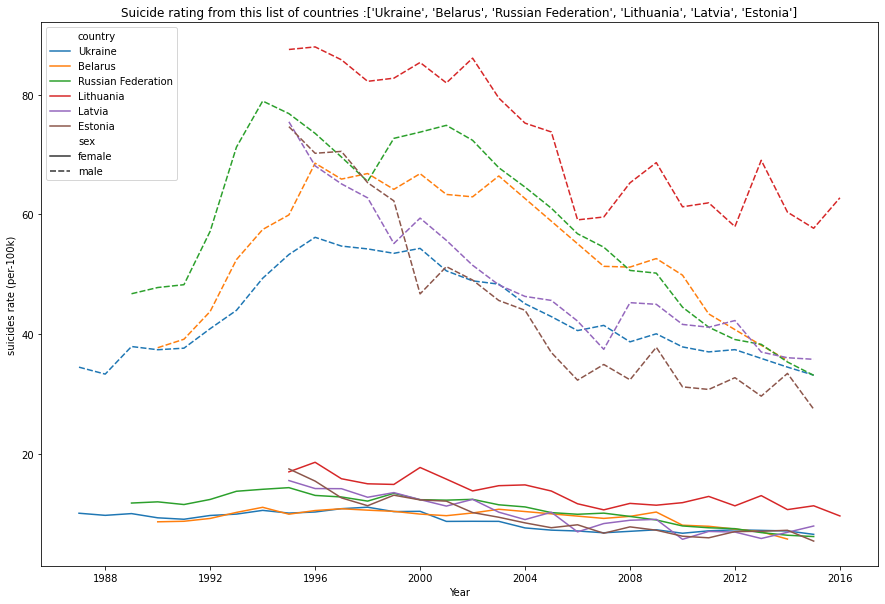

In [86]:
plot_suicide_rating(['Ukraine', 'Belarus', 'Russian Federation', 'Lithuania','Latvia','Estonia'])

In [35]:
#a function to plot 3 variables (suicide rates, unemployment and depresion rate) giving the country and sex

def plot_suicide_variables(country,sex):

    fig, ax1 = plt.subplots(figsize=(20,10))
    
    fig.subplots_adjust(right=0.8)

    ax2 = ax1.twinx()
    ax3 = ax1.twinx()
    ax3.spines["right"].set_position(("axes", 1.1))
    
    df=data_country(country).loc[data_country(country)['sex']==sex]
    
    ax1.plot(df['year'], df['suicides_per_100K'], 'r-',label="suicides rate (per-100k)",linewidth=4)

    #(% of female labor force)    
    ax2.plot(df['year'], df['unemployment'], 'g-', label="Unemployment rate",linestyle='--') 
    
    ax3.plot(df['year'], df['depression_rate'],color='m',label="Depression rate",linestyle='--')
    
    ax1.set_xlabel("Year")
    ax1.set_ylabel("suicides rate (per-100k)")
    ax2.set_ylabel("Unemployment rate")
    ax3.set_ylabel("Depression rate")
    
    ax1.yaxis.label.set_color('red')
    ax2.yaxis.label.set_color('green')
    ax3.yaxis.label.set_color('m')
    
    plt.title(f'Suicide, unemployment and depression rate for {sex} from {country}')


    

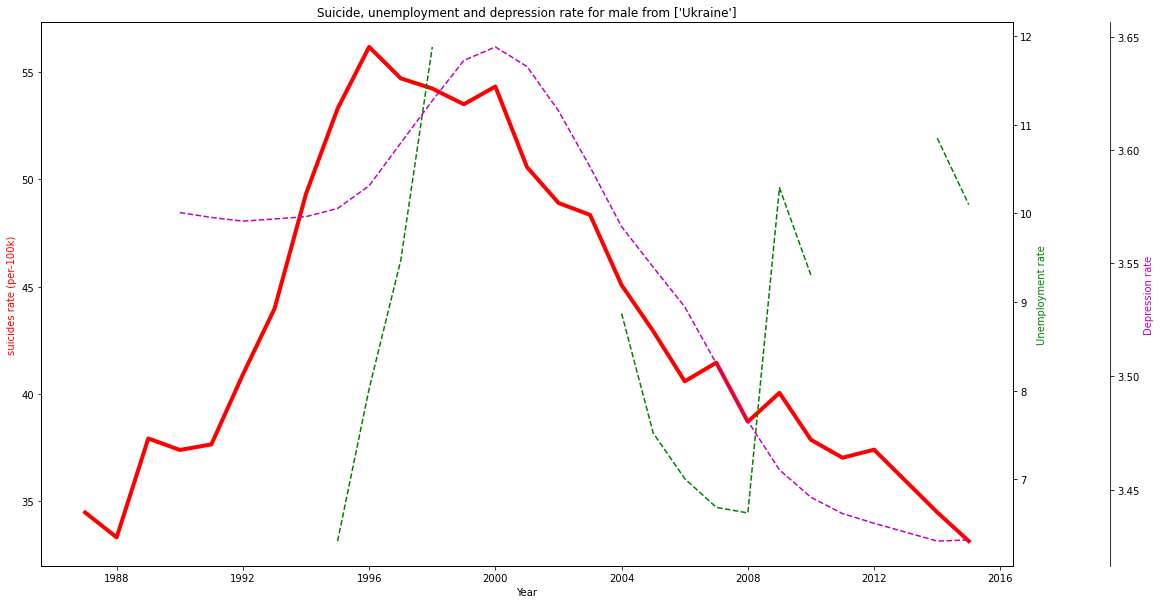

In [76]:
# give a country list to the function

plot_suicide_variables(['Ukraine'], 'male')

### as with could see there was a lot of missing values for some countries

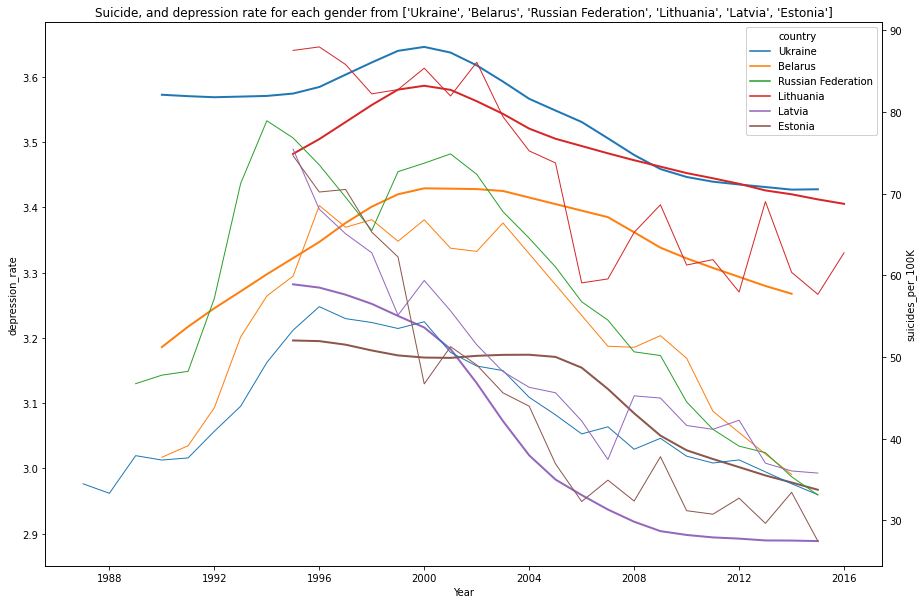

In [90]:

def plot_depressive_rating(country,sex):
    fig, ax = plt.subplots(figsize=(15,10))
    
    df=data_country(country).loc[data_country(country)['sex']==sex]

    ax = sns.lineplot(x=df['year'],
                         y=df['depression_rate'],
                         hue=df['country'], data=df,linewidth=2 )
    
    ax1 = ax.twinx() 
    
    ax1 = sns.lineplot(x=df['year'],
                       y=df['suicides_per_100K'],
                       hue=df['country'],data=df,dashes=True,linewidth=1)
    
    ax.set_xlabel("Year")
    ax.set_ylabel("depression_rate")
    ax1.set_ylabel("suicides_per_100K")
    
    plt.title(f'Suicide, and depression rate for each gender from {country}')
    
    #store the image
    plt.savefig(f'../ploting/suicide_depression_R_{country}.png')
    
# give a list of countries
plot_depressive_rating(['Ukraine', 'Belarus', 'Russian Federation', 'Lithuania','Latvia','Estonia'],'male')    

In [39]:
#building a function to test models and see the coeficients


def model_country(country,sex):
    df=data_country(country).loc[data_country(country)['sex']==sex].dropna()
    df = sm.add_constant(df)
    y = df['suicides_per_100K']
    X = df[[ 'const','unemployment','depression_rate']]
    lin_reg = sm.OLS(y, X).fit()
    return lin_reg.summary()

In [70]:
# output results depending country and gender

model_country(['Ukraine', 'Belarus', 'Russian Federation', 'Lithuania','Latvia','Estonia'],'male')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      suicides_per_100K   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     12.14
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           0.000173
Time:                        16:09:14   Log-Likelihood:                -114.31
No. Observations:                  30   AIC:                             234.6
Df Residuals:                      27   BIC:                             238.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -103.0905     30.876     -3.339      0.002    -166.443     -39.738
unemployment        0.8068      0.370      2.180      0.038       0.048       1.566
depression_rate    43.9767      9.162      4.800      0.000      25.177      62.776
==============================================================================
Omnibus:                        1.790   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.409   Jarque-Bera (JB):                0.872
Skew:                           0.389   Prob(JB):                        0.647
Kurtosis:                       3.302   Cond. No.                         203.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""